## Problem statement:
We have got a dataset about customer feedback from fastest growing startups in logistics and deliver domain. The dataset contains different features listed below and need to predict if customer is happy or not with the services being provided. 

The goal here is to make predictions if the customer would be happy or unhappy based on the provided input features (data gathered about the deliveries) & based on this analysis, take necessary actions to make every effort to make a customer happy

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

The dataset is from a recent customer survey and we need to make predictions bsed on given data. 


### Data Description:

-  Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
-  X1 = my order was delivered on time.
-  X2 = contents of my order was as I expected
-  X3 = I ordered everything I wanted to order
-  X4 = I paid a good price for my order
-  X5 = I am satisfied with my courier
-  X6 = the app makes ordering easy for me


In [193]:
## adding required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [194]:
## loading customer data into dataframe
customer_df = pd.read_csv('../data/ACME-HappinessSurvey2020.csv')
customer_df.head()


,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


### Exploratory data analysis:

In [195]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [196]:
customer_df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [197]:
features_info = []
features = ['X1','X2','X3','X4','X5','X6']
features_info = [ ]
for feature in features:
    #  print(f'mean of {feature}:')
    #  print(customer_df[feature].mean())
    #  print(f"median of {feature}:")
    #  print(customer_df[feature].median())
    #  print(f"mode of {feature}:")
    #  print(customer_df[feature].mode()[0])
     features_info.append({
          'feature': feature,
            'mean': customer_df[feature].mean(),
            'median': customer_df[feature].median(),
            'mode': customer_df[feature].mode()[0]
        })
     


In [198]:
features_info_df = pd.DataFrame(features_info)
features_info_df.head(10)

,feature,mean,median,mode
0,X1,4.333333,5.0,5
1,X2,2.531746,3.0,3
2,X3,3.309524,3.0,3
3,X4,3.746032,4.0,4
4,X5,3.650794,4.0,4
5,X6,4.253968,4.0,5


In [199]:
# writing to a csv file under reports folder
features_info_df.to_csv('../reports/feature_stats.csv', index=False)

In [200]:
print(features_info_df)

  feature      mean  median  mode
0      X1  4.333333     5.0     5
1      X2  2.531746     3.0     3
2      X3  3.309524     3.0     3
3      X4  3.746032     4.0     4
4      X5  3.650794     4.0     4
5      X6  4.253968     4.0     5


In [201]:
## checking for null values

customer_df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

### No null values reported

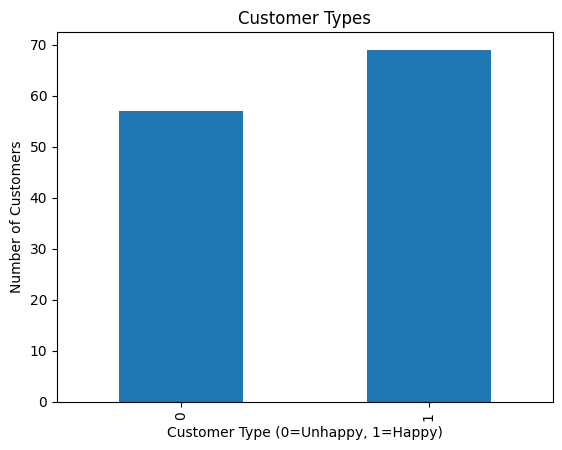

In [202]:
customer_type_df=customer_df.groupby('Y').size()
customer_type_df.plot(kind='bar')
plt.title('Customer Types')
plt.xlabel('Customer Type (0=Unhappy, 1=Happy)')
plt.ylabel('Number of Customers')
#save the plot as png
plt.savefig('../reports/figures/customer_types.png')

In [203]:
print(customer_type_df)

Y
0    57
1    69
dtype: int64


In [204]:
print("happy customers:", customer_type_df[1])
print("unhappy customers:",customer_type_df[0])



happy customers: 69
unhappy customers: 57


Text(0.5, 0, 'Customer Type (0=Unhappy, 1=Happy)')

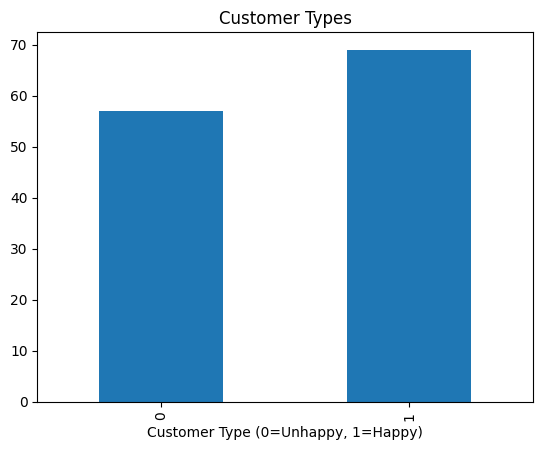

In [205]:
#customer_type_df=customer_type_df.size()
customer_type_df.plot(kind='bar')
plt.title('Customer Types')
plt.xlabel('Customer Type (0=Unhappy, 1=Happy)')

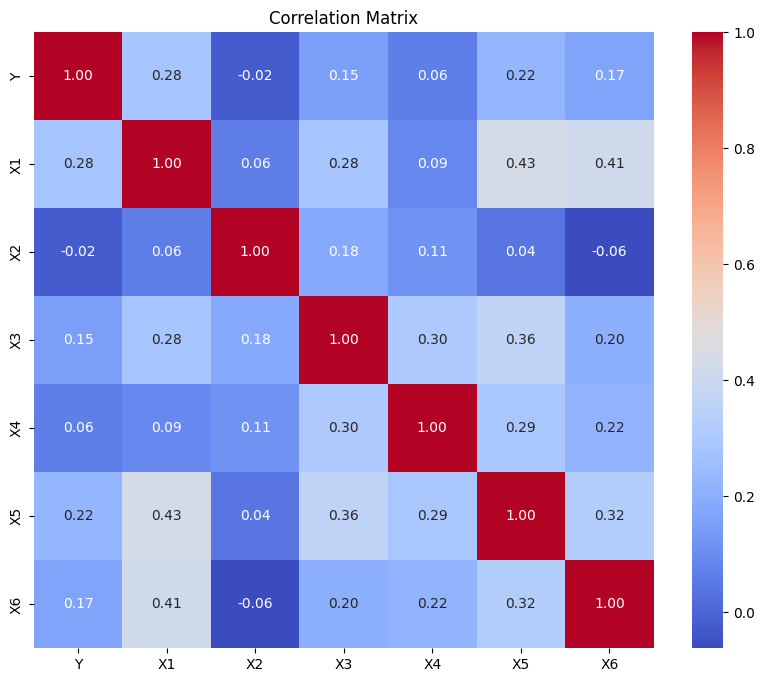

In [206]:
#correlation matrix
correlation_matrix = customer_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
## saving the plot as png
plt.savefig('../reports/figures/correlation_matrix.png')

Some observations about full dataset:
- X1 & X5 are closely related.
- X1 & X6 seems closely related too. 
- X3 & X5 seems closely related too. 

In [207]:
happy_cust_df = customer_df[customer_df['Y'] == 1]
unhappy_cust_df = customer_df[customer_df['Y'] == 0]

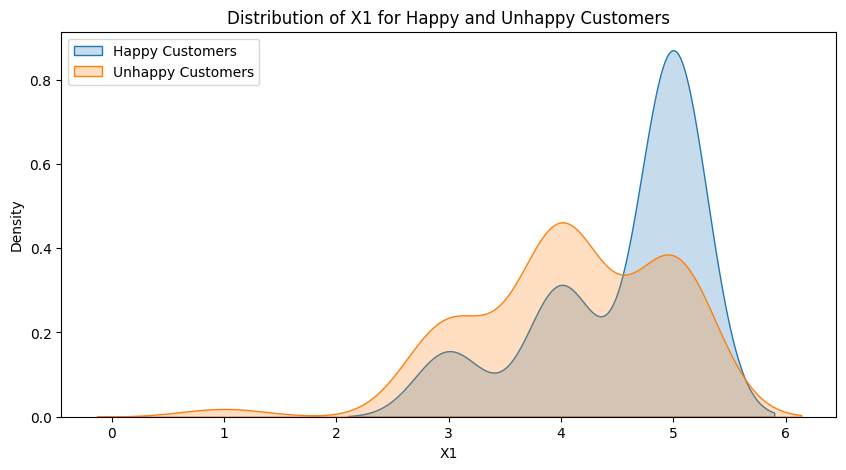

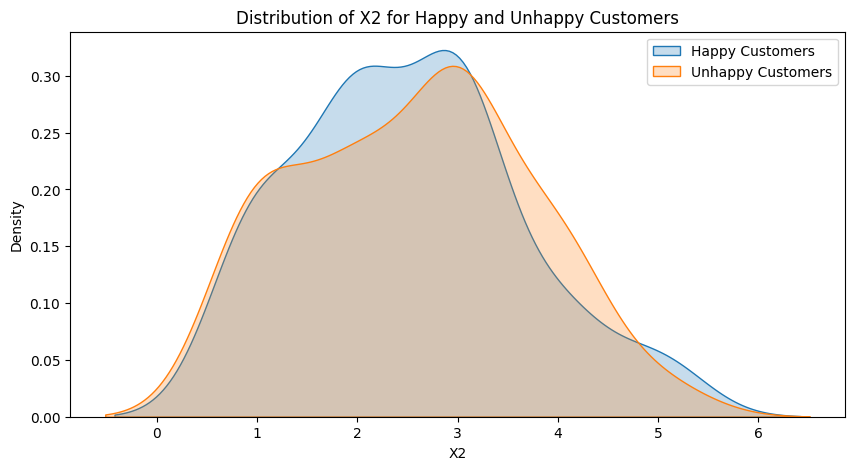

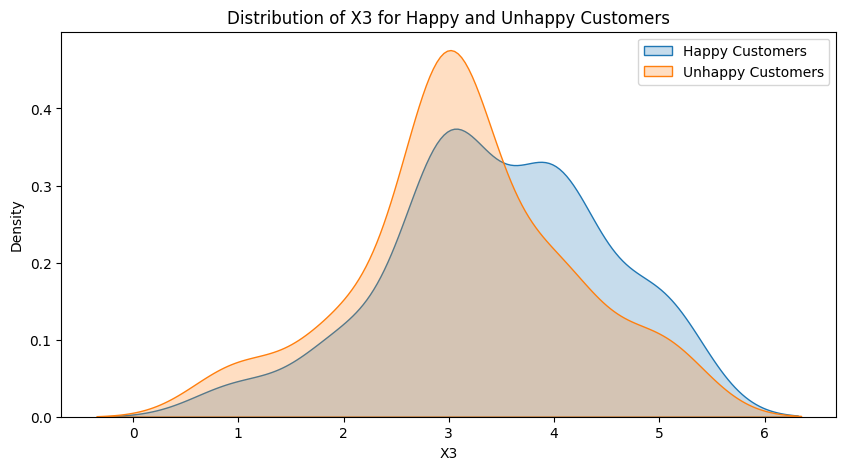

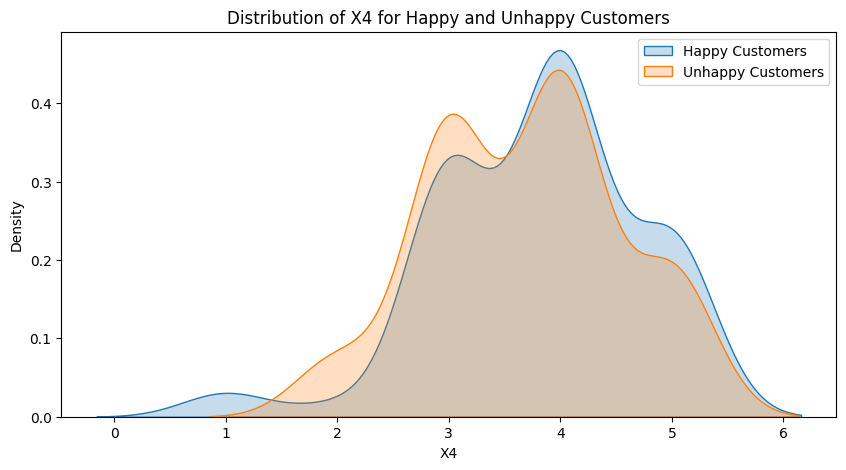

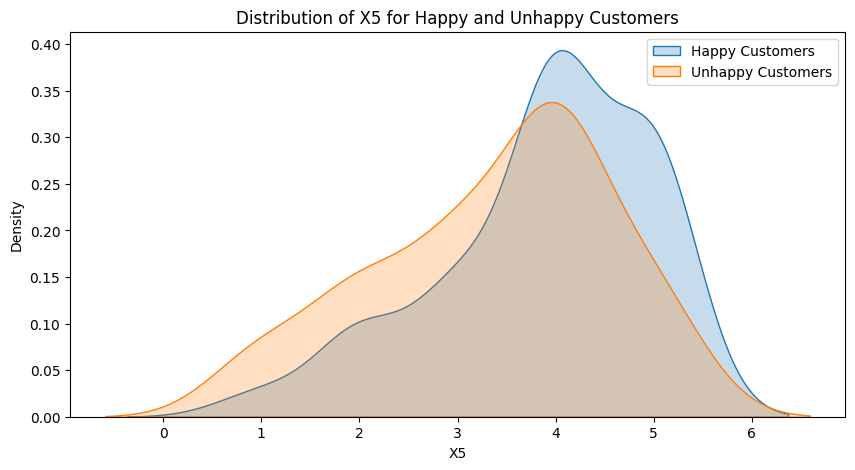

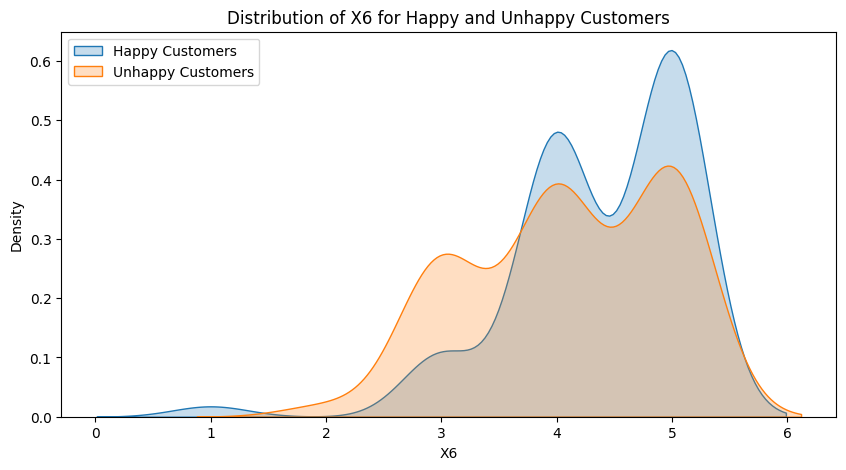

In [208]:
# plot distributions of features for happy and unhappy customers
features = ['X1','X2','X3','X4','X5','X6']
for feature in features:
    plt.figure(figsize=(10,5))
    sns.kdeplot(happy_cust_df[feature], label='Happy Customers', fill=True)
    sns.kdeplot(unhappy_cust_df[feature], label='Unhappy Customers', fill=True)
    plt.title(f'Distribution of {feature} for Happy and Unhappy Customers')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    #save the plot as png
    plt.savefig(f'../reports/figures/{feature}_distribution.png')
    plt.show()

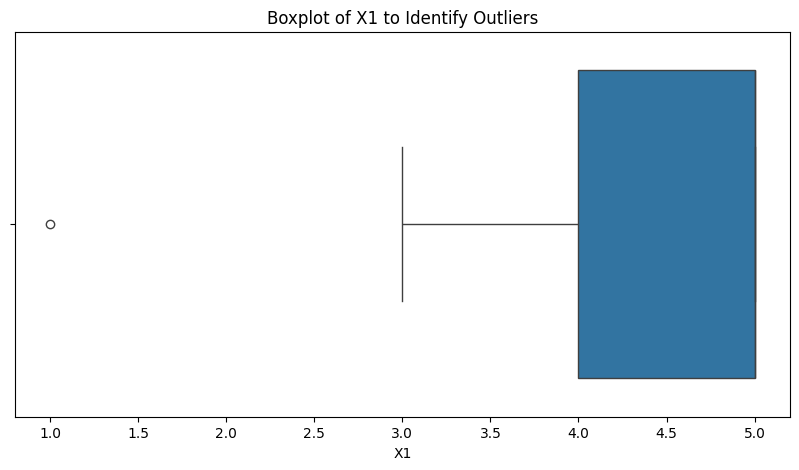

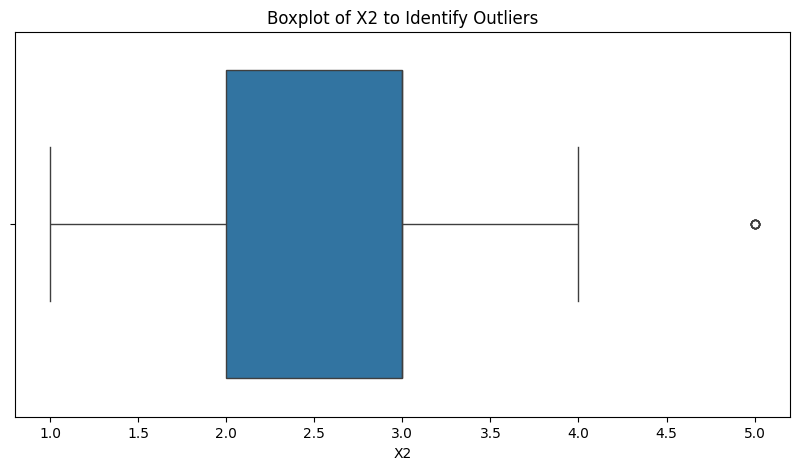

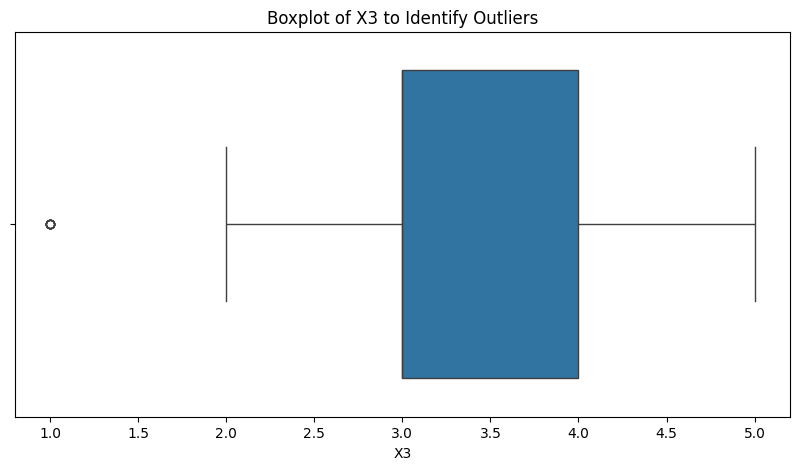

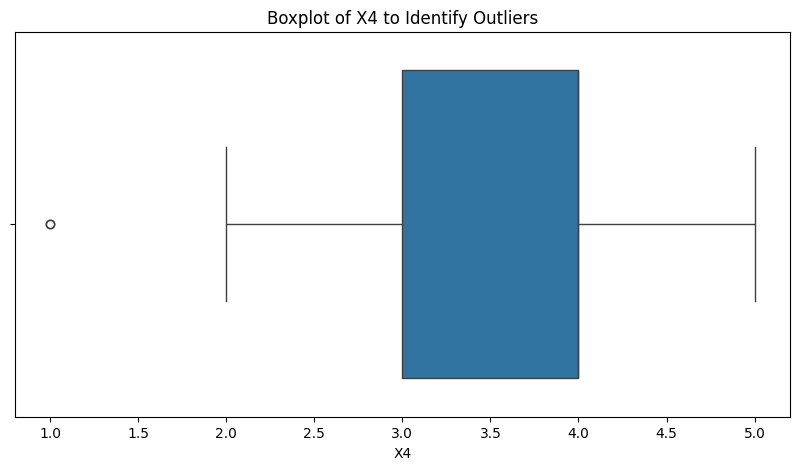

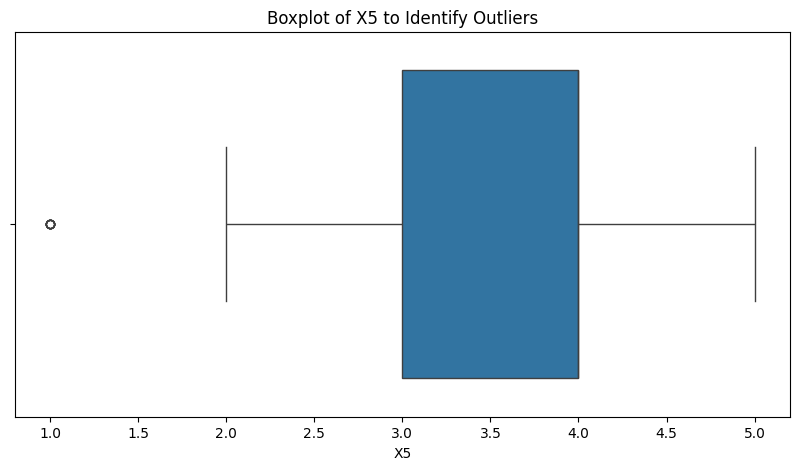

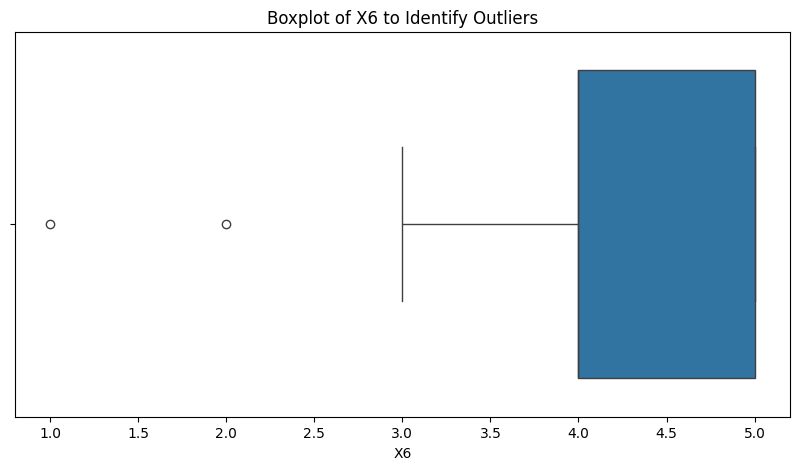

In [209]:
# finding outliers in features
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=customer_df[feature])
    plt.title(f'Boxplot of {feature} to Identify Outliers')
    plt.xlabel(feature)
    plt.show()

In [210]:
# function to detect outliers using IQR method
def detect_outliers_iqr(data, feature):
    feature_series = pd.Series(data[feature])
    
    # Compute IQR
    Q1 = feature_series.quantile(0.25)
    Q3 = feature_series.quantile(0.75)
    IQR = Q3 - Q1
    
    # Outlier condition
    outliers = feature_series[(feature_series < (Q1 - 1.5 * IQR)) | (feature_series > (Q3 + 1.5 * IQR))]
    return outliers.values

In [211]:
outliers=[]
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
for feature in features:
    print(f'Outliers in {feature}:', detect_outliers_iqr(customer_df, feature))
    outliers.append({'feature':feature, 'outliers':detect_outliers_iqr(customer_df, feature)
                     })

Outliers in X1: [1]
Outliers in X2: [5 5 5 5 5 5]
Outliers in X3: [1 1 1 1 1 1 1]
Outliers in X4: [1 1]
Outliers in X5: [1 1 1 1 1 1 1]
Outliers in X6: [2 1]


In [212]:
print(outliers)
outliers_df=pd.DataFrame(outliers)
print(outliers_df)

[{'feature': 'X1', 'outliers': array([1])}, {'feature': 'X2', 'outliers': array([5, 5, 5, 5, 5, 5])}, {'feature': 'X3', 'outliers': array([1, 1, 1, 1, 1, 1, 1])}, {'feature': 'X4', 'outliers': array([1, 1])}, {'feature': 'X5', 'outliers': array([1, 1, 1, 1, 1, 1, 1])}, {'feature': 'X6', 'outliers': array([2, 1])}]
  feature               outliers
0      X1                    [1]
1      X2     [5, 5, 5, 5, 5, 5]
2      X3  [1, 1, 1, 1, 1, 1, 1]
3      X4                 [1, 1]
4      X5  [1, 1, 1, 1, 1, 1, 1]
5      X6                 [2, 1]


In [213]:
#merge outliers with features_info_df
features_info_df = features_info_df.merge(outliers_df, left_on='feature', right_on='feature', how='left')
#features_info_df.drop('featurename', axis=1, inplace=True)
# save to csv
features_info_df.to_csv('../reports/feature_stats_with_outliers.csv', index=False)

In [214]:
# remove the repeating values in outliers

features_info_df['outliers']=features_info_df['outliers'].apply(lambda x: np.unique(x).tolist())

In [215]:
features_info_df.head(10)

,feature,mean,median,mode,outliers
0,X1,4.333333,5.0,5,[1]
1,X2,2.531746,3.0,3,[5]
2,X3,3.309524,3.0,3,[1]
3,X4,3.746032,4.0,4,[1]
4,X5,3.650794,4.0,4,[1]
5,X6,4.253968,4.0,5,"[1, 2]"


In [216]:
features_info_df.head(10)

,feature,mean,median,mode,outliers
0,X1,4.333333,5.0,5,[1]
1,X2,2.531746,3.0,3,[5]
2,X3,3.309524,3.0,3,[1]
3,X4,3.746032,4.0,4,[1]
4,X5,3.650794,4.0,4,[1]
5,X6,4.253968,4.0,5,"[1, 2]"


In [217]:
skewness_values = []
feature_name = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
for feature in feature_name:
    skewness_value = customer_df[feature].skew()
    print(f"Skewness of {feature}: {skewness_value}")
    if skewness_value > 1:
        print(f"The distribution of {feature} is highly positively skewed.")
        skewness_values.append({'feature': feature, 'skewness': skewness_value, 'skewness_type': 'highly positively skewed'})
    elif skewness_value < -1:
        print(f"The distribution of {feature} is highly negatively skewed.")
        skewness_values.append({'feature': feature, 'skewness': skewness_value, 'skewness_type': 'highly negatively skewed'})
    elif 0.5 < skewness_value <= 1:
        print(f"The distribution of {feature} is moderately positively skewed.")
        skewness_values.append({'feature': feature, 'skewness': skewness_value, 'skewness_type': 'moderately positively skewed'})
    elif -1 <= skewness_value < -0.5:
        print(f"The distribution of {feature} is moderately negatively skewed.")
        skewness_values.append({'feature': feature, 'skewness': skewness_value, 'skewness_type': 'moderately negatively skewed'})
    else:
        print(f"The distribution of {feature} is approximately symmetrical.")
        skewness_values.append({'feature': feature, 'skewness': skewness_value, 'skewness_type': 'approximately symmetrical'})


Skewness of X1: -1.0584677419354833
The distribution of X1 is highly negatively skewed.
Skewness of X2: 0.270999638359618
The distribution of X2 is approximately symmetrical.
Skewness of X3: -0.19953604195426672
The distribution of X3 is approximately symmetrical.
Skewness of X4: -0.42223960472556293
The distribution of X4 is approximately symmetrical.
Skewness of X5: -0.6999992813112076
The distribution of X5 is moderately negatively skewed.
Skewness of X6: -0.9575897324514261
The distribution of X6 is moderately negatively skewed.


In [218]:
skewness_values_df = pd.DataFrame(skewness_values)
print(skewness_values_df)

  feature  skewness                 skewness_type
0      X1 -1.058468      highly negatively skewed
1      X2  0.271000     approximately symmetrical
2      X3 -0.199536     approximately symmetrical
3      X4 -0.422240     approximately symmetrical
4      X5 -0.699999  moderately negatively skewed
5      X6 -0.957590  moderately negatively skewed


In [219]:
#merge skewness_values_df with features_info_df
features_info_df = features_info_df.merge(skewness_values_df, left_on='feature', right_on='feature', how='left')
features_info_df.to_csv('../reports/feature_stats_with_outliers_and_skewness.csv', index=False)

In [220]:
features_info_df.head(10)

,feature,mean,median,mode,outliers,skewness,skewness_type
0,X1,4.333333,5.0,5,[1],-1.058468,highly negatively skewed
1,X2,2.531746,3.0,3,[5],0.271000,approximately symmetrical
2,X3,3.309524,3.0,3,[1],-0.199536,approximately symmetrical
3,X4,3.746032,4.0,4,[1],-0.422240,approximately symmetrical
4,X5,3.650794,4.0,4,[1],-0.699999,moderately negatively skewed
5,X6,4.253968,4.0,5,"[1, 2]",-0.957590,moderately negatively skewed


## End of EDA

### Conclusions:

- X1 & X6 are very closely related.
- X3 & X5 seems closely related too. 
- X5 & X6 seems closely related too.
- X2/X3/X4 features are symmetrical while X1 is highly negatively skewed and X5 & X6 are modeteraly negatively skewed



## **Model selection & training**



In [87]:
## Model selection & Training

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import StandardScaler


In [50]:
## setting input and output variables
customer_df_input = customer_df.drop('Y', axis=1)
customer_df_output = customer_df['Y']

In [69]:
X,y = customer_df_input, customer_df_output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Least important features:
 X6    0.142083
X4    0.159212
X3    0.169047
X1    0.172543
X5    0.174902
dtype: float64


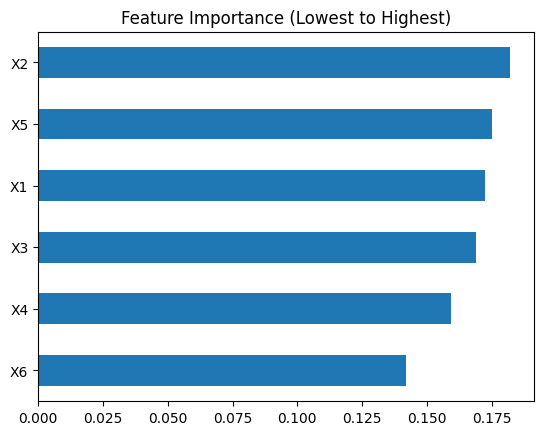

In [70]:
# Train model
model_rf = RandomForestClassifier()
model_rf.fit(X, y)

# Get feature importance
importances = pd.Series(model_rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True, inplace=True)

# Show least important
print("Least important features:\n", importances.head())

importances.plot(kind='barh', title='Feature Importance (Lowest to Highest)')
plt.savefig('../reports/figures/feature_importance.png')
plt.show()

In [71]:
# train the random forest model again with train-test split with test size 20% and all features
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [72]:
model_rf.score(X_train, y_train)

0.94

In [73]:
model_rf.score(X_test,y_test)

0.6538461538461539

In [192]:
# testing with logistic regression model
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('transform', PowerTransformer(method='yeo-johnson')),
    ('scale', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

pipe.fit(X_train, y_train)
print("Accuracy:", pipe.score(X_test, y_test))
print("F1 score:", f1_score(y_test, pipe.predict(X_test)))

Accuracy: 0.5
F1 score: 0.5185185185185185


In [146]:
#removing the least imortant feature X6
X,y = customer_df_input[['X1','X2','X3','X4','X5']], customer_df_output

In [147]:
# doing the train-test split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [148]:
# retraining with random forest classifier without X6
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [149]:
model_rf.score(X_train, y_train)

0.9

In [150]:
model_rf.score(X_test, y_test)

0.7307692307692307

f1_score: 0.72
Accuracy: 0.7307692307692307
[[10  5]
 [ 2  9]]


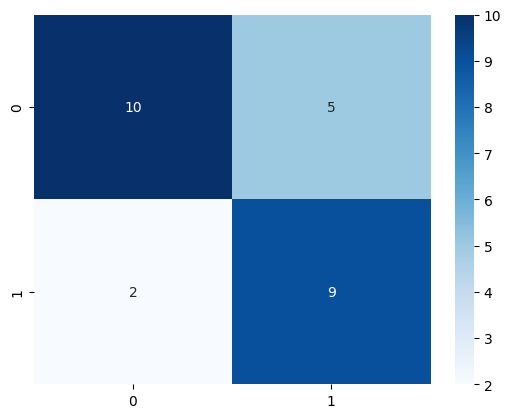

In [157]:
print("f1_score:", f1_score(y_test, model_rf.predict(X_test)))
print("Accuracy:", accuracy_score(y_test, model_rf.predict(X_test)))
print(confusion_matrix(y_test, model_rf.predict(X_test)))
confusion_matrixdisplay = sns.heatmap(confusion_matrix(y_test, model_rf.predict(X_test)), annot=True, fmt='d', cmap='Blues')

In [187]:
# training using knn
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=2,leaf_size=2)
model_knn.fit(X_train, y_train)


,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,2
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [188]:
model_knn.score(X_train, y_train)


0.79

In [189]:
model_knn.score(X_test, y_test)

0.6538461538461539

f1_score: 0.5714285714285714
Accuracy: 0.6538461538461539
[[11  4]
 [ 5  6]]


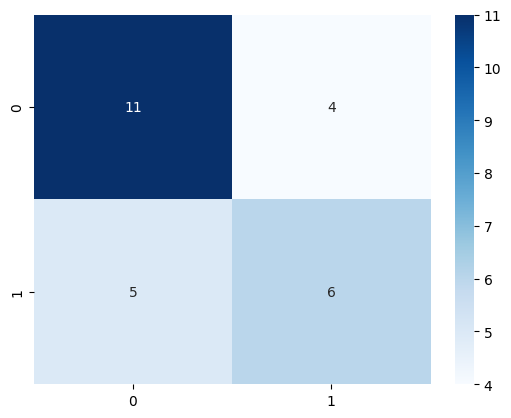

In [190]:
print("f1_score:", f1_score(y_test, model_knn.predict(X_test)))
print("Accuracy:", accuracy_score(y_test, model_knn.predict(X_test)))
print(confusion_matrix(y_test, model_knn.predict(X_test)))
confusion_matrixdisplay = sns.heatmap(confusion_matrix(y_test, model_knn.predict(X_test)), annot=True, fmt='d', cmap='Blues')

## Summary about the prediction:

- Models tested: RandomForestClassifier, LogisticRegression (with PowerTransformer and StandardScaler), KNeighborsClassifier.
- Train-test split: 80-20.
- After removing X6 (least important), RandomForest achieved: 
  - Accuracy: ~0.73
  - F1 Score: ~0.75
- KNN: 
  - Accuracy: ~0.65 
  - F1 Score: ~0.57.  
- LogisticRegression with preprocessing: Lower performance compared to others.

### so, in summary the best prediction / performance achieved using randomforest classifier after removing the least important input (X6) from dataset.